In [1]:
import os, sys
dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
if not dir1 in sys.path: sys.path.append(dir1)
import importlib
import matplotlib.pyplot as plt
from _helper._load_csv import aggreagate_csv_from_cluster, read_csv
import os
from script_figure import labels_plot
import script_figure.helper_figure as hf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import SFFI.util_plot as ut_plot
from _helper import utils

ut_plot.set_favorite_plot_config()
aggreagate_csv_from_cluster(select_file="figure_1", path=os.path.abspath('') + "/csv")
notation_drift = "F"

Look in  /home/andonis/These/Jupyter/PASTIS_PRL_github/csv
['lotka_volterra_dim_7_n.pkl', 'OrnsteinUhlenbeck_repulsive_gaussian_n.pkl', 'OrnsteinUhlenbeck_repulsive_gaussian_diffusion_strength.pkl', 'large_deviation_dim_8.pkl', 'large_deviation_dim_3.pkl', 'large_deviation_dim_6.pkl', 'OrnsteinUhlenbeck_dim_10_n.pkl', 'lotka_volterra_dim_7_benchmark_sindy_n.pkl', 'lorenz_critical_constant_noise_p_n.pkl', 'Misspecified_model_figure_1_diffusion_strength.pkl', 'lotka_volterra_dim_7_p_n.pkl', 'grayscott_dt.pkl', 'OrnsteinUhlenbeck_p_dim_10_n.pkl', 'grayscott_n.pkl', 'grayscott_p_n.pkl', 'grayscott_diffusion_strength.pkl', 'lorenz_critical_constant_noise_n.pkl', 'lorenz_critical_constant_noise_experimental_noise.pkl', 'lorenz_critical_constant_noise_diffusion_vs_time_diffusion_strength.pkl', 'lotka_volterra_dim_7_diffusion_strength.pkl', 'lorenz_critical_constant_noise_dt.pkl', 'large_deviation_dim_7.pkl', 'large_deviation_dim_9.pkl', 'large_deviation_dim_10.pkl', 'large_deviation_dim_5.pkl

In [2]:
import script_cluster.figure_1 as figure_1
importlib.reload(figure_1)
from SFFI import simulation as simu
from SFFI import sffi as inf
from script_cluster.figure_1 import parameter_simulation, base_1, base_2, compute_force_set, para, color_base_2, color_base_1, F_t, name_base_1, name_base_2
import jax

data = read_csv("figure_1.pkl")
parameter_simulation["key"] = jax.random.PRNGKey(0)
phi, delta_t = simu.simulate(**parameter_simulation)
tau = np.array(range(0, len(phi)))*delta_t
phi = phi[:,0]

[Errno 2] No such file or directory: 'figure_1.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/figure_1.pkl'


In [4]:
import brokenaxes
from brokenaxes import BrokenAxes
importlib.reload(brokenaxes)

def plot_data_exemple(ax):
    tau = delta_t*np.array([i for i in range(len(phi))])
    ax.plot(tau, phi) # type: ignore
    ax.set_xlabel("Time $t$")
    ax.set_ylabel("$x$")
    #ax.set_title("Data")
    ax.margins(x=0)

def plot_forces_infered(ax : plt.Axes, i_start, legend : bool = False, bbox_to_anchor=(-1.2, 1)):
    inf_1_data = inf.SFFI(base_1, phi[:i_start], para["dt"])
    inf_2_data = inf.SFFI(base_2, phi[:i_start], para["dt"])
    phi_sort = np.argsort(phi)
    x = phi[phi_sort]
    F_real = np.einsum("i,i...", para["coefficient"], [F_t(x)])
    F_estimated_1 = compute_force_set(inf_1_data, phi=x)[:,0]
    F_estimated_2 = compute_force_set(inf_2_data, phi=x)[:,0]
    param_plot = { "ls" : "-"}
    #ax.plot(x, F_real, ls="--", lw=2, label="true $f$", color=ut_plot.cmaps[-1]) # type: ignore
    ax.plot(x, (F_estimated_2 - F_real)**1, **param_plot, color=color_base_2, label="$%s$"%name_base_2, )
    ax.plot(x, (F_estimated_1 - F_real)**1, **param_plot, color=color_base_1, label="$%s$"%name_base_1)

    ax.set_xlim(-0.8, 0.8)
    ax.set_ylim(-2, 2)

    ax.set_xlabel("$x$")#, labelpad=-4)
    #ax.set_title("Inferred drift")
    if not legend:
        ax.set_ylabel(r"$\hat{%s}^\mathcal{B} - %s$"%(notation_drift,notation_drift))#, labelpad=-5)
    if legend:
        ax.yaxis.set_ticklabels([])
        leg = ax.legend(ncol=1, loc='upper left', framealpha=0, columnspacing=0.1, fontsize=5,)

def plot_data_exemple_broken_axes(subplot_spec, fig=None):
    tau = delta_t*np.array([i for i in range(len(phi))])
    bax = BrokenAxes(xlims=((0, tau[i_start]), (30,tau[-1])), subplot_spec=subplot_spec, fig=fig,)
    bax.set_xlabel('Time $t$')
    bax.set_ylabel("$x$")
    bax.plot(tau, phi) # type: ignore
    bax.margins(x=0)
    [x.remove() for x in bax.diag_handles]
    #bax.axs[1].yaxis.set_visible(False)
    return bax
    
i_start = int(5/delta_t)

fig = plt.figure(figsize=ut_plot.set_size("article", subplots=(2, 1), scale_height=1))

gs = gridspec.GridSpec(2,1, figure=fig)
#ax_1 = fig.add_subplot(gs[0, :])
ax_1 = None
gs0 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[1,0], wspace=0.1)
ax_2 = [fig.add_subplot(gs0[0,0]), fig.add_subplot(gs0[0, 1])]

def plot_part_1(subplot_spec, ax_2, bbox_to_anchor=(-1.2, 1), fontsize=6, fig=None):
    #plot_data_exemple(ax_1, index_phi=index_phi)
    plot_forces_infered(ax_2[0], i_start, legend=False, bbox_to_anchor=bbox_to_anchor)
    plot_forces_infered(ax_2[1], -1, legend=True, bbox_to_anchor=bbox_to_anchor)
    ax_1 = plot_data_exemple_broken_axes(subplot_spec, fig=fig)
    ax_2[0].set_title("short trajectory", fontsize=fontsize, pad=3)
    ax_2[1].set_title("long trajectory", fontsize=fontsize, pad=3)
    return ax_1, ax_2

def add_zoom_effect(ax_1, ax_2):
    print(tau)
    print(ax_2[1].get_xlim())
    utils.zoom_effect01(ax_1, ax_2[0], 0, tau[i_start], *ax_2[0].get_xlim(), ls="--", color="black", in_layout=False, alpha=0.3)
    utils.zoom_effect01(ax_1, ax_2[1], 0, 17, *ax_2[1].get_xlim(), ls=":", color="black", in_layout=False, alpha=0.3)
    pass

bax, ax_2 = plot_part_1(gs[0], ax_2)
ax_1 = bax.axs[0]
add_zoom_effect(ax_1, ax_2)
plt.tight_layout()
bax.draw_diags()

[0.0000e+00 1.0000e-03 2.0000e-03 ... 3.9997e+01 3.9998e+01 3.9999e+01]
(np.float64(-0.8), np.float64(0.8))


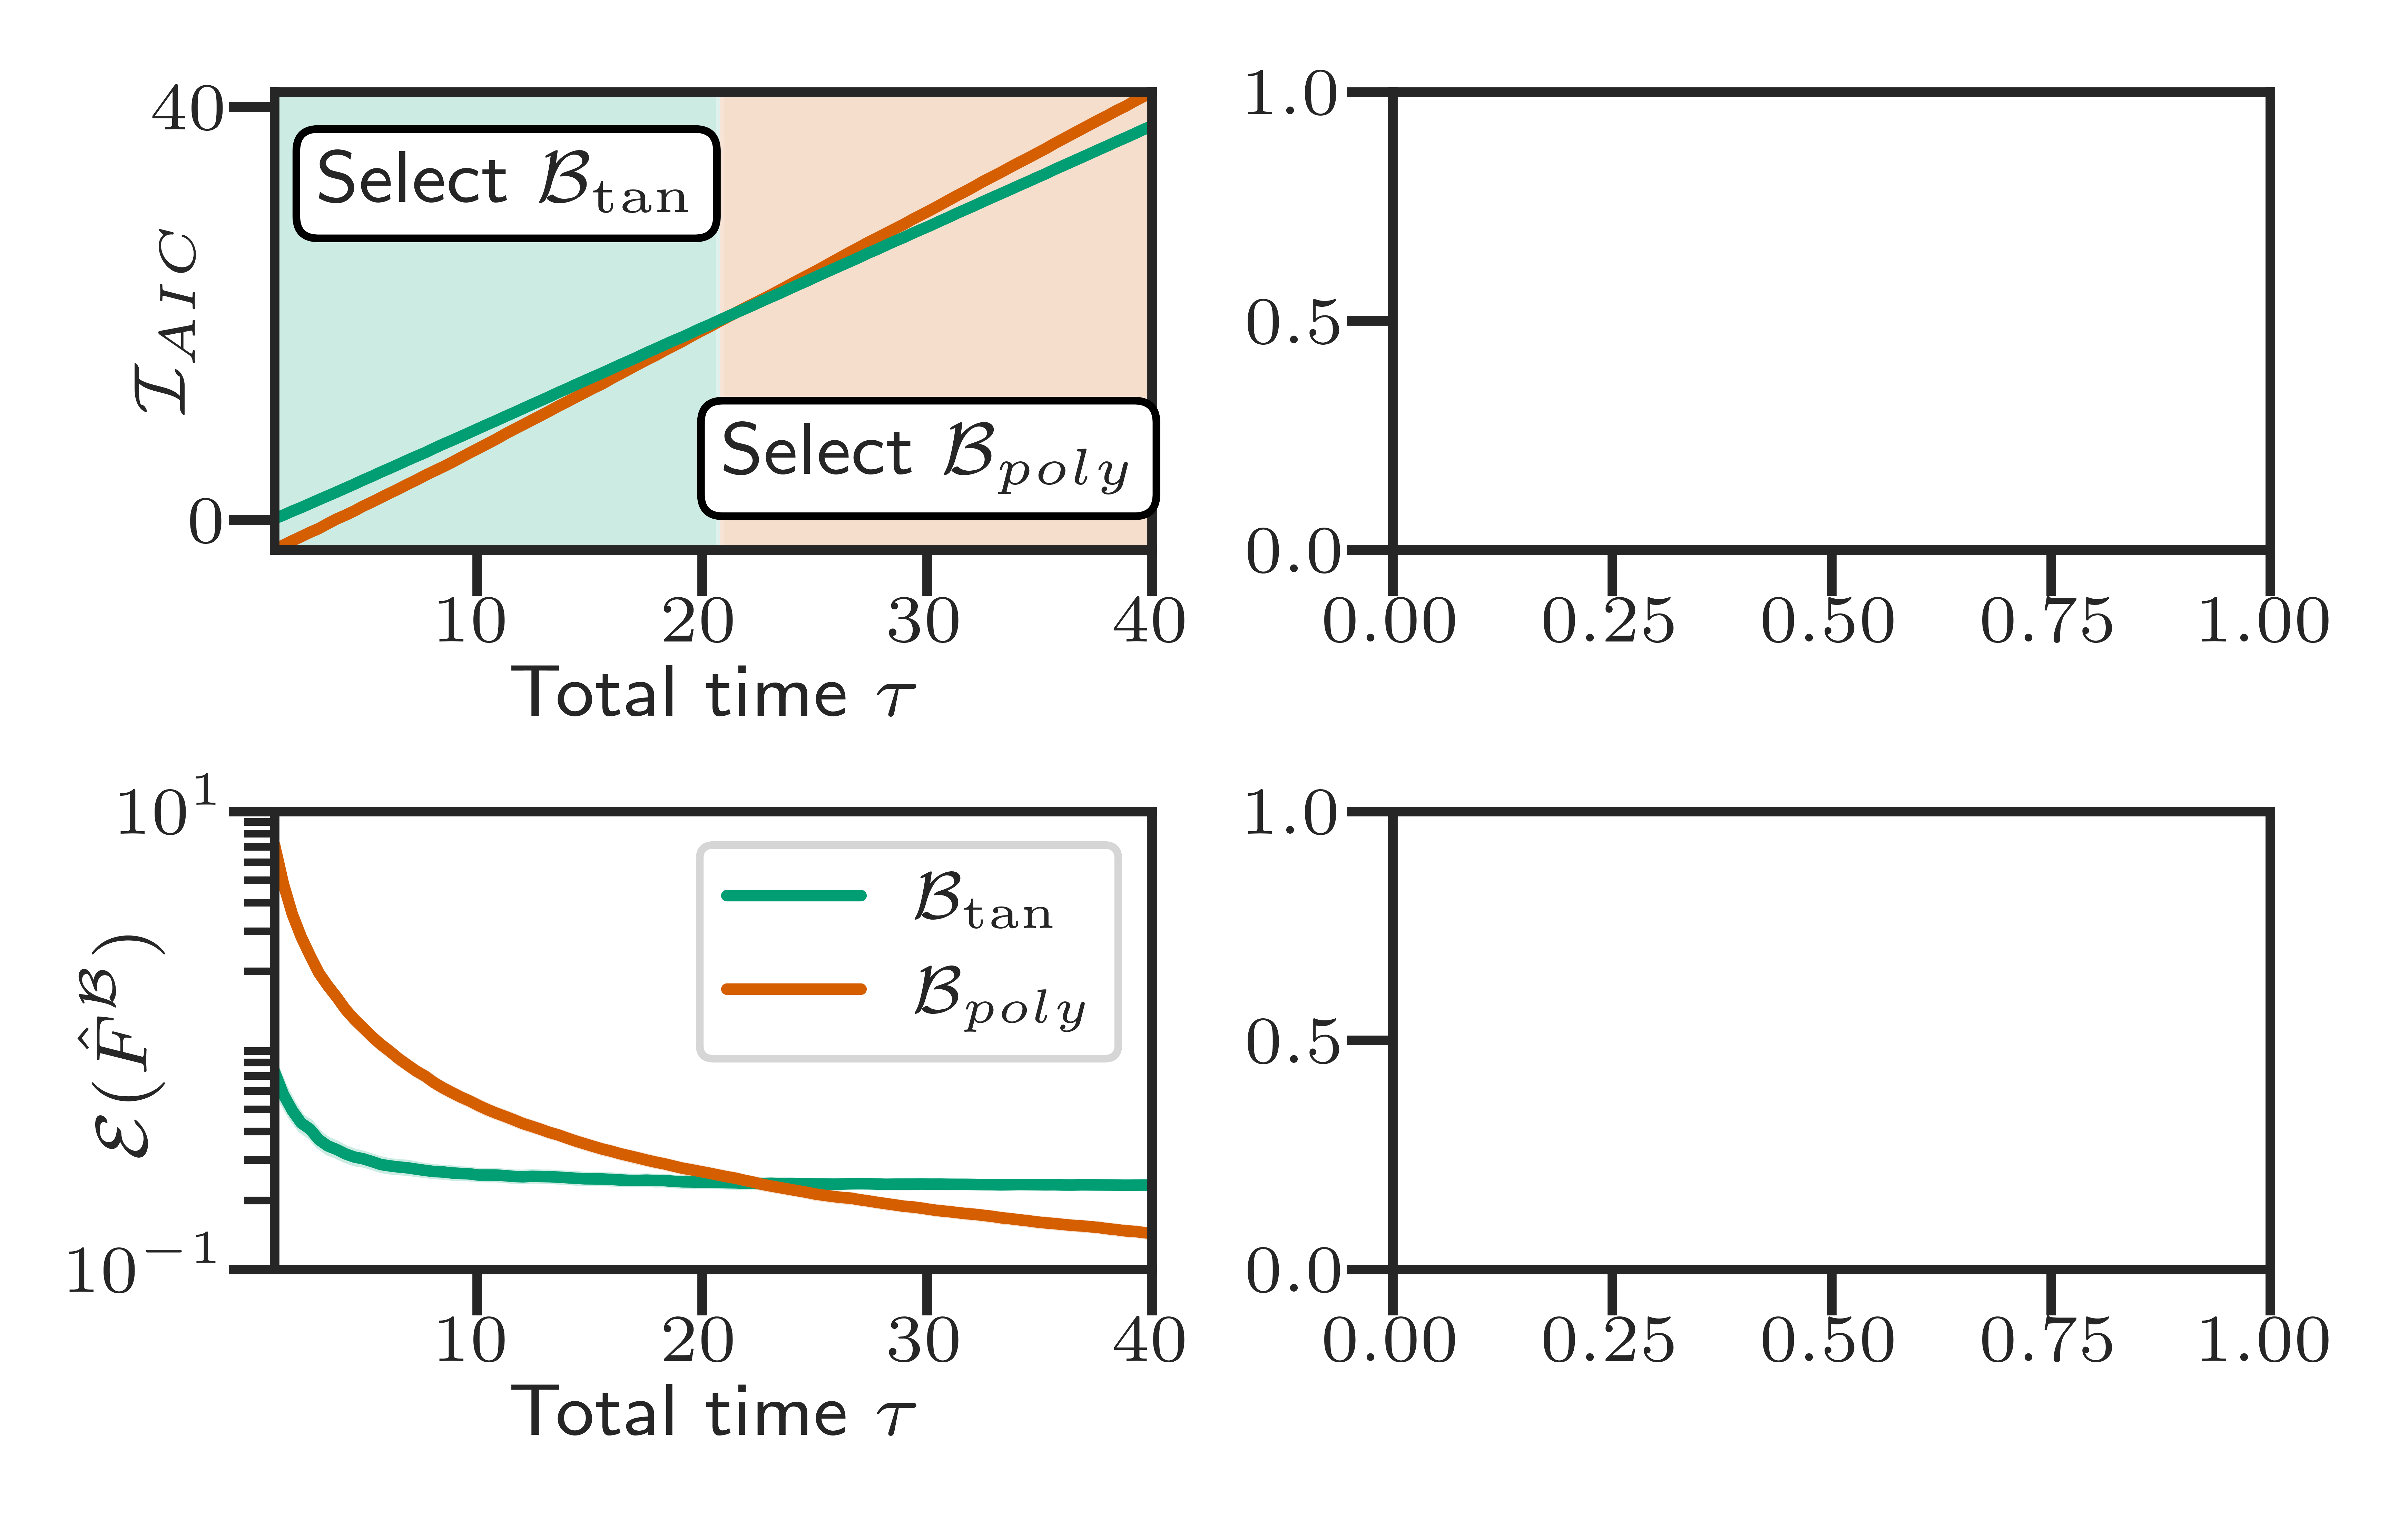

In [5]:
import matplotlib.patches as patches
import pandas as pd
import seaborn as sns

def plot_error_data(data : pd.DataFrame, ax : plt.Axes, labelpad=-10):
    sns.lineplot(data=data, x="time", y="error_base_2", label="$%s$"%name_base_2, color=color_base_2, ax=ax)
    sns.lineplot(data=data, x="time", y="error_base_1", label="$%s$"%name_base_1, color=color_base_1, ax=ax)
    #sns.lineplot(data=data, x="time", y="delta_error", hue="base", ax=ax, errorbar=("ci", 99), marker="+")
    ax.set_xlabel(r"Total time $\tau$")
    ax.set_ylabel(r"$\mathcal{E}(\hat{%s}^\mathcal{B})$"%notation_drift, labelpad=labelpad)
    ax.set_yscale("log")
    ax.margins(x=0, y=0)
    ax.margins(x=0, y=0)
    ax.set_yticks([0.1,10])
    #ax.set_title("Error")
    # set the legend out of the box on the right side
    leg = ax.legend(fontsize=7)
    leg.set_in_layout(False)

def plot_remainder(data : pd.DataFrame, ax : plt.Axes, labelpad=-5):
    sns.lineplot(data=data, x="time", y="I_AIC_1", ax=ax, label="$%s$"%name_base_1, color=color_base_1, errorbar=None)
    sns.lineplot(data=data, x="time", y="I_AIC_2", ax=ax, label="$%s$"%name_base_2, color=color_base_2, errorbar=None)
    ax.legend().remove()
    #ax.axhline(0, ls="--", color="black")
    ax.set_xlabel(r"Total time $\tau$")
    #ax.set_title("$\mathcal{I}(\{%s\}) -  \mathcal{I}(\{%s\})$"%(name_base_1, name_base_2))
    #ax.set_ylabel("$\mathcal{I}_{AIC}(\mathcal{B}_{poly}) - \mathcal{I}_{AIC}(\mathcal{B}_{\\tan})$")
    ax.set_ylabel("$\mathcal{I}_{AIC}$", labelpad=labelpad)
    #ax.set_yscale("log")
    #ax.margins(x=0, y=0)
    tau = data["time"].unique().tolist()
    ax.set_yticks([0,40])
    l_diff_cost = data.groupby('time')['delta_I_AIC'].mean().tolist()
    if l_diff_cost[0] > 0:
        name_1 = name_base_1
        name_2 = name_base_2
    else:
        name_1 = name_base_2
        name_2 = name_base_1
    ax.margins(x=0, y=0)

    x_inter_1 = np.argmin(np.abs(l_diff_cost))*tau[-1]/len(l_diff_cost)
    #x_inter_1 = utils.find_intersection_zero(tau, l_diff_cost) #+ (tau[1] - tau[2])/2
    ax.text(0.05, 0.8, "Select $%s$"%name_1, rotation=0., transform=ax.transAxes,
         ha="left", va="center",
         bbox=dict(boxstyle="round",
                   ec=(0, 0, 0),
                   fc=(1., 1, 1),
                   )
         )
    rect = patches.Rectangle((0, ax.get_ylim()[0]), x_inter_1, ax.get_ylim()[1]-ax.get_ylim()[0], facecolor=color_base_2, alpha=0.2)
    ax.add_patch(rect)

    x_inter_2 = x_inter_1 #utils.find_intersection_zero(tau, l_diff_cost) #- (tau[1] - tau[2])/2
    ax.text(0.98, 0.2, "Select $%s$"%name_2, rotation=0.,
         ha="right", va="center", transform=ax.transAxes,
         bbox=dict(boxstyle="round",
                   ec=(0, 0, 0),
                   fc=(1., 1, 1),
                   )
         )
    rect = patches.Rectangle((x_inter_2, ax.get_ylim()[0]), ax.get_xlim()[1] - x_inter_2, ax.get_ylim()[1]-ax.get_ylim()[0], facecolor=color_base_1, alpha=0.2)
    ax.add_patch(rect)

fig, ax = plt.subplots(2,2, figsize=ut_plot.set_size("article", fraction=1, subplots=(2,2)), layout="constrained")
ax1 = ax[0,0]
plot_remainder(data, ax[0,0])
plot_error_data(data, ax[1,0])
#ax[0,0].sharex(ax[1,0])
plt.show()
# sns.lineplot(data=data, x="time", y="variance_base_1_base_2")
# variance_df = data.groupby("time")["I_AIC"].var().reset_index()

# plt.plot(variance_df["time"], variance_df["I_AIC"], marker='o', linestyle='-', color='b')
# # Plot the variance of I_AIC in data
# plt.show()


[0.0000e+00 1.0000e-03 2.0000e-03 ... 3.9997e+01 3.9998e+01 3.9999e+01]
(np.float64(-0.8), np.float64(0.8))


/tmp/ipykernel_452182/2111093138.py:45: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=0.4)


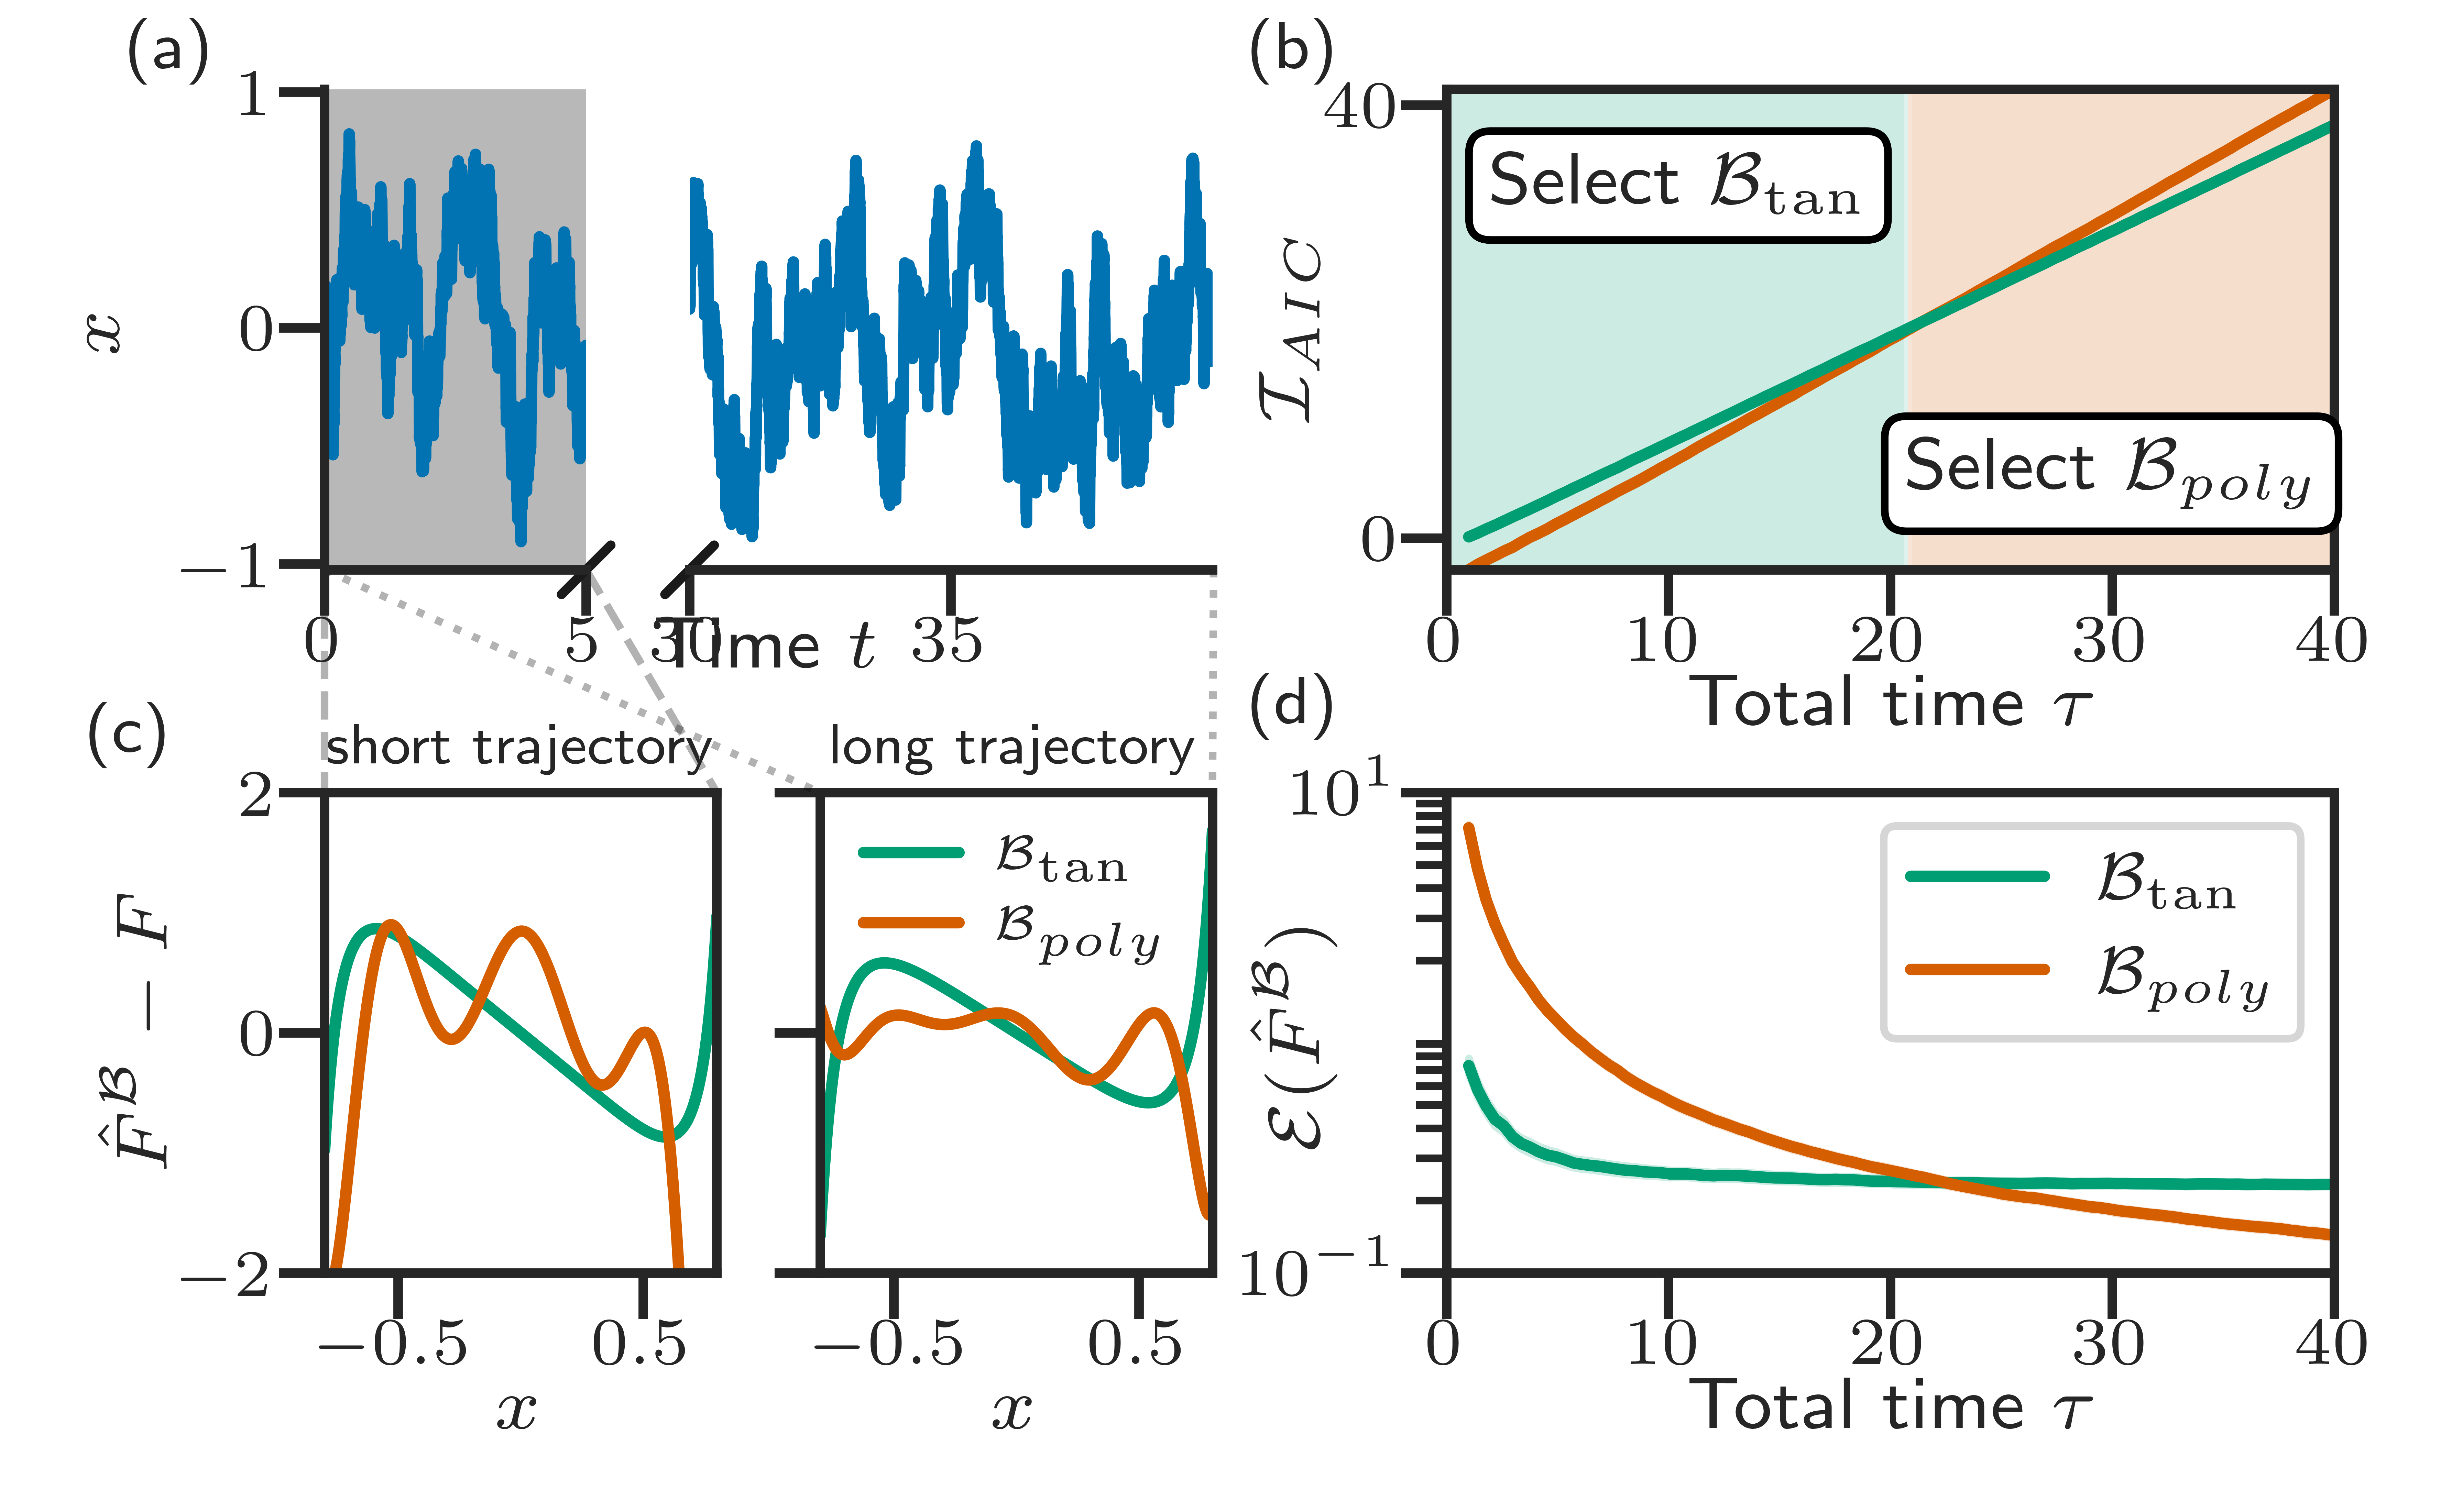

In [6]:
import script_figure.helper_figure as hf

ut_plot.set_favorite_plot_config(font_scale=0.8)
add_letter = hf.add_letter
fig = plt.figure(figsize=ut_plot.set_size("article", subplots=(2,2), fraction=1), layout="constrained")

gs0 = fig.add_gridspec(2, 2)
gs00 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs0[1,0])
#ax_1 = fig.add_subplot(gs[0, 0])
ax_2 = [fig.add_subplot(gs00[0]), fig.add_subplot(gs00[1])]
axs = gs0.subplots(sharex=None)
ax_1 = axs[0,0]
ax_1.remove()
axs[1,0].remove()
ax_3 = axs[0,1]
ax_4 = axs[1,1]
ax_3.sharex(ax_4)

bax_1, ax_2 = plot_part_1(gs0[0,0], ax_2, bbox_to_anchor=(-1.55, 1.1), fontsize=6, fig=fig)
plot_remainder(data, ax_3)
plot_error_data(data, ax_4)

ax_1 = bax_1.big_ax
add_zoom_effect(bax_1.axs[0], ax_2)

for ax  in [ax_1, ax_2[0], ax_2[1], ax_3, ax_4]:
    ax.xaxis.labelpad = 0
    ax.yaxis.labelpad = 0  # Adjust this value as needed
    
ax_1.xaxis.labelpad = 5
ax_1.yaxis.labelpad = 12
ax_4.yaxis.labelpad = -10

x = -0.22
y = 1.01
for ax in ax_2:
    ax.set_xticks([-0.5, 0.5])
add_letter(ax_1, "a", x=x, y=y)
add_letter(ax_2[0], "c", x=-0.6, y=1.05)
#add_letter(ax_2[1], "c2", x=-0.32, y=1.18)
add_letter(ax_3, "b", x=x, y=y)
add_letter(ax_4, "d", x=x, y=y+0.1)

#plt.tight_layout()
plt.tight_layout(pad=0.4)
bax_1.draw_diags()
bax_1.set_ylabel("$x$", labelpad=20)
plt.savefig("figures/learned_on_data_vs_true_force.png", bbox_inches='tight')